# Series

In [248]:
import pandas as pd

Put list into a Pandas series:

In [249]:
temps = [12, 10, 12, 12, 13]
temps


[12, 10, 12, 12, 13]

In [250]:
ts = pd.Series(temps)
ts

0    12
1    10
2    12
3    12
4    13
dtype: int64

This shows the series index and value.

As pandas series is a dictionary, to check if an element is in one you need to use the series values:

In [251]:
10 in ts.values

True

Compare with:

In [252]:
10 in ts

False

Another way to do this is with:

In [253]:
10 in set(ts)

True

In [254]:
any(ts.isin([10]))

True

Update index to be a string code for day of week:

In [255]:
index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu']
ts = pd.Series(data = ts.values, index = index, name = 'daily')
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    13
Name: daily, dtype: int64

In [256]:
ts.Thu = 11
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Name: daily, dtype: int64

Convert from Celsius to Fahrenheit:

In [257]:
fs = (ts * 9/5) + 32
fs

Sun    53.6
Mon    50.0
Tue    53.6
Wed    53.6
Thu    51.8
Name: daily, dtype: float64

Same, but using apply:

In [258]:
to_fahrenheit = lambda c : (c * 9/5) + 32
fs = ts.apply(to_fahrenheit)
fs


Sun    53.6
Mon    50.0
Tue    53.6
Wed    53.6
Thu    51.8
Name: daily, dtype: float64

## Index Operations on a Series

You can get scalars from a series in lots of different ways:

In [259]:
ts['Mon'] == ts.loc['Mon'] and ts[1] == ts.Mon and ts.Mon == ts.iloc[1] and ts.Mon == 10

True

As we have a string index the `loc` functions work on location *and* position.

## Append to a Series

In [260]:
ts['Fri'] = 15
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
Name: daily, dtype: int64

Alternatively,

In [261]:
ts = ts.append(pd.Series(20, index=['Sat']))
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
Sat    20
dtype: int64

This lost the series column name. It would have retained it if you also included a `name` parameter. You can set / reset a column name with:

In [262]:
ts.reset_index(name='daily')
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
Sat    20
dtype: int64

In [263]:
ts = ts.append(pd.Series(20, index=['Sat']))
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
Sat    20
Sat    20
dtype: int64

Oops! I've added too many Saturdays, so delete last with:

In [264]:
ts = ts[:-1]
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
Sat    20
dtype: int64

## Remove from a Series

Delete all Saturdays!

In [265]:
del ts['Sat']
ts

Sun    12
Mon    10
Tue    12
Wed    12
Thu    11
Fri    15
dtype: int64

## Select from a Series

Can select from Series, for example all temperatures above 11:

In [266]:
ts[ts > 11]

Sun    12
Tue    12
Wed    12
Fri    15
dtype: int64

Select weekend temperatures:

In [267]:
# put back our deleted Saturday
ts = ts.append(pd.Series(20, index=['Sat'], name='daily'))

# create a mask of weekend days
weekends = ts.index.str.contains('^S')
weekends

# use mask to show just weekend temperatures
ts[weekends]

Sun    12
Sat    20
dtype: int64

## Time Series

Use a date as the index.

In [268]:
days = pd.date_range(start='10-Oct-2021', end='16-Oct-2021')
ds = ts = pd.Series(data=ts.values, index=days, name='daily')
ds


2021-10-10    12
2021-10-11    10
2021-10-12    12
2021-10-13    12
2021-10-14    11
2021-10-15    15
2021-10-16    20
Freq: D, Name: daily, dtype: int64

## Duplicates

Show duplicates in a series. The function will return a boolean index indicating whether the value at the index is duplicated.

In [269]:
ds.duplicated()

2021-10-10    False
2021-10-11    False
2021-10-12     True
2021-10-13     True
2021-10-14    False
2021-10-15    False
2021-10-16    False
Freq: D, Name: daily, dtype: bool

Or, you just ask if there any duplicates in the series?

In [270]:
ds.duplicated().any()

True

Keep the last duplicated entry:

In [271]:
ds.duplicated(keep='last')

2021-10-10     True
2021-10-11    False
2021-10-12     True
2021-10-13    False
2021-10-14    False
2021-10-15    False
2021-10-16    False
Freq: D, Name: daily, dtype: bool

Or show all duplicated entries.

In [272]:
mask = ds.duplicated(keep=False)
ds[mask]

2021-10-10    12
2021-10-12    12
2021-10-13    12
Name: daily, dtype: int64

Or show entries **not** duplicated.

In [273]:
mask = ds.duplicated(keep=False)
ds[~mask]

2021-10-11    10
2021-10-14    11
2021-10-15    15
2021-10-16    20
Name: daily, dtype: int64

See also the `drop_duplicates()` function.

## NaN

Dealing with not-a-number values. You can select NaN entries, drop them, or fill them.

In [274]:
ns = pd.Series(data=[11, 12, 12, 14, 13, 15, None])
ns

0    11.0
1    12.0
2    12.0
3    14.0
4    13.0
5    15.0
6     NaN
dtype: float64

In [275]:
mask = ns.isna()
ns[mask]

6   NaN
dtype: float64

In [276]:
ns = ns.fillna(method='ffill')
ns

0    11.0
1    12.0
2    12.0
3    14.0
4    13.0
5    15.0
6    15.0
dtype: float64

## Plotting

If using Pandas in a script you normally don't need to import as it is already included. The import is required for Jupyter notebooks.

In [277]:
%matplotlib inline

import matplotlib as plt

<AxesSubplot:>

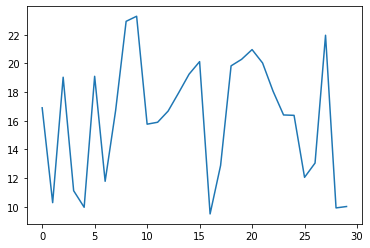

In [278]:
values = np.random.uniform(low=9, high=25, size=30)
ns = pd.Series(data=values, name='daily')
ns.plot()

Text(0, 0.5, 'temperature (°C)')

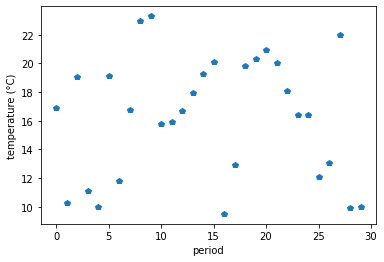

In [279]:
ax = ns.plot(style='p')
ax.set_xlabel('period')
ax.set_ylabel('temperature (°C)')

Text(0, 0.5, 'frequency')

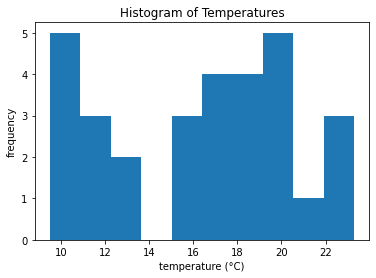

In [280]:
ax = ns.plot.hist()
ax.set_title('Histogram of Temperatures')
ax.set_xlabel('temperature (°C)')
ax.set_ylabel('frequency')


## Serialise a Series

To save a series to a CSV file including index and value headers.

In [281]:
values = np.random.uniform(low=9, high=25, size=5)
ns = pd.Series(data=values, name='daily')
ns.to_csv('data.csv', header=True, index_label='period')

Show the contents of the CSV file:

In [282]:
cat -n data.csv

     1	period,daily
     2	0,12.822393931577867
     3	1,20.81914466878011
     4	2,19.182448718197463
     5	3,12.907804006901822
     6	4,21.213679498347698


Now read the CSV data. The function will load this into a data frame.

In [283]:
xs = pd.read_csv('data.csv')
xs

,period,daily
0,0,12.822394
1,1,20.819145
2,2,19.182449
3,3,12.907804
4,4,21.213679


In [284]:
xs.dtypes

period      int64
daily     float64
dtype: object

To convert back into a series use:

In [285]:
ys = pd.Series(data=xs.daily)
ys

0    12.822394
1    20.819145
2    19.182449
3    12.907804
4    21.213679
Name: daily, dtype: float64

## Summary Statistics

You can get the usual statistics using the methods `mean`, `max`, `min`, etc. Or you can get full summary statistics using `describe`:

In [291]:
ts

2021-10-10    12
2021-10-11    10
2021-10-12    12
2021-10-13    12
2021-10-14    11
2021-10-15    15
2021-10-16    20
Freq: D, Name: daily, dtype: int64

In [286]:
ts.describe()

count     7.000000
mean     13.142857
std       3.387653
min      10.000000
25%      11.500000
50%      12.000000
75%      13.500000
max      20.000000
Name: daily, dtype: float64

How many times does a value appear?

In [287]:
ts.value_counts()

12    3
15    1
20    1
11    1
10    1
Name: daily, dtype: int64

What if we have a categorical series?

In [288]:
cs = pd.Series(data=['Java', 'Haskell', 'Python', 'Haskell', 'Haskell', 'Python'], name='language', dtype='category')
cs

0       Java
1    Haskell
2     Python
3    Haskell
4    Haskell
5     Python
Name: language, dtype: category
Categories (3, object): ['Haskell', 'Java', 'Python']

Show the most popular language as given by count of references in series:

In [289]:
cs.value_counts()

Haskell    3
Python     2
Java       1
Name: language, dtype: int64

Show some more summary statistic of categorical data series:

In [290]:
cs.describe()

count           6
unique          3
top       Haskell
freq            3
Name: language, dtype: object